# Introduction to Computer Vision: Plant Seedlings Classification


## Problem Statement


### Context


In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective


The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.


### Data Dictionary


The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
  - images.npy
  - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet


### **Note: Please use GPU runtime on Google Colab to execute the code faster.**


## Importing necessary libraries


In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user
import os
import numpy as np  # Importing numpy for Matrix Operations
import pandas as pd  # Importing pandas to read CSV files
import matplotlib.pyplot as plt  # Importting matplotlib for Plotting and visualizing images
import math  # Importing math module to perform mathematical operations
import cv2  # Importing openCV for image processing
import seaborn as sns  # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
)  # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import (
    Sequential,
)  # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
)  # Defining all the layers to build our CNN Model
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.optimizers import (
    Adam,
    SGD,
)  # Importing the optimizers which can be used in our model
from tensorflow.keras import backend
from sklearn import (
    preprocessing,
)  # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import (
    train_test_split,
)  # Importing train_test_split function to split the data into train and test
from sklearn.metrics import (
    confusion_matrix,
)  # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
import random
import ydata_profiling as ydp

# Ignore warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: _After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again._


In [3]:
import random

random_state = 42
import random

random.seed(random_state)

batch_size = 32
epochs = 500
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action="ignore", category=DataConversionWarning)

## Loading the dataset


In [4]:
# Uncomment and run the below code if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')
# Load the image file of dataset
images = np.load(r"D:\Dev\AI-ML-Project-Data\Plants-Seedling-Classification\images.npy")

# Load the labels file of dataset
labels = pd.read_csv(
    r"D:\Dev\AI-ML-Project-Data\Plants-Seedling-Classification\Labels.csv"
)

In [5]:
# Show labels
labels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

## Data Overview


### Understand the shape of the dataset


In [6]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


In [7]:
# Show unique labels
unique_labels = labels["Label"].unique()
print(unique_labels)

['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


## Exploratory Data Analysis


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.


1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)


In [8]:
def plot_images(images, labels):
    num_classes = 10  # Number of Classes
    categories = np.unique(labels)
    keys = dict(labels["Label"])  # Obtaing the unique classes from y_train
    rows = 3  # Defining number of rows=3
    cols = 4  # Defining number of columns=4
    fig = plt.figure(figsize=(10, 8))  # Defining the figure size to 10x8
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(
                0, len(labels)
            )  # Generating random indices from the data and plotting the images
            ax = fig.add_subplot(
                rows, cols, i * rows + j + 1
            )  # Adding subplots with 3 rows and 4 columns
            ax.imshow(images[random_index, :])  # Plotting the image
            ax.set_title(keys[random_index])
    plt.show()

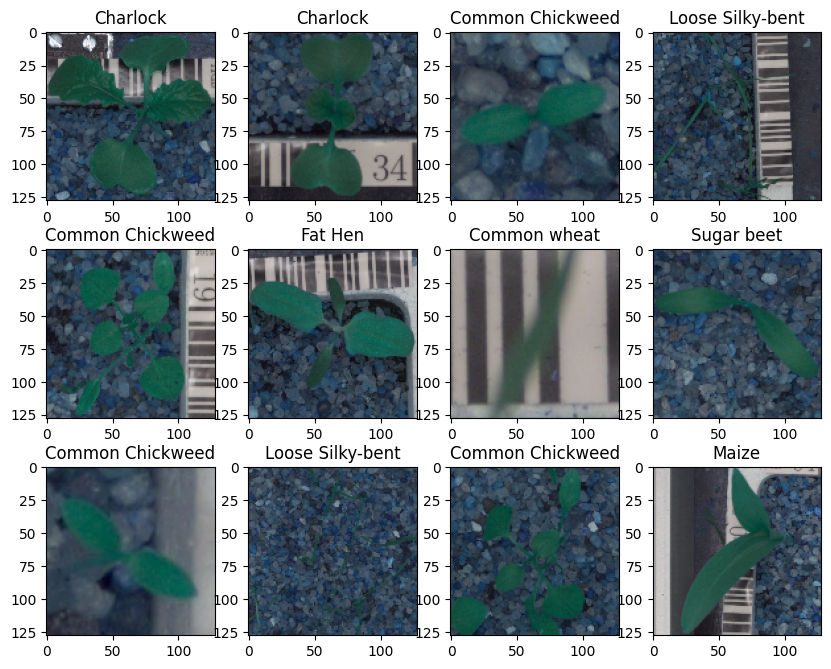

In [9]:
plot_images(images, labels)

#### Check for data imbalance


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

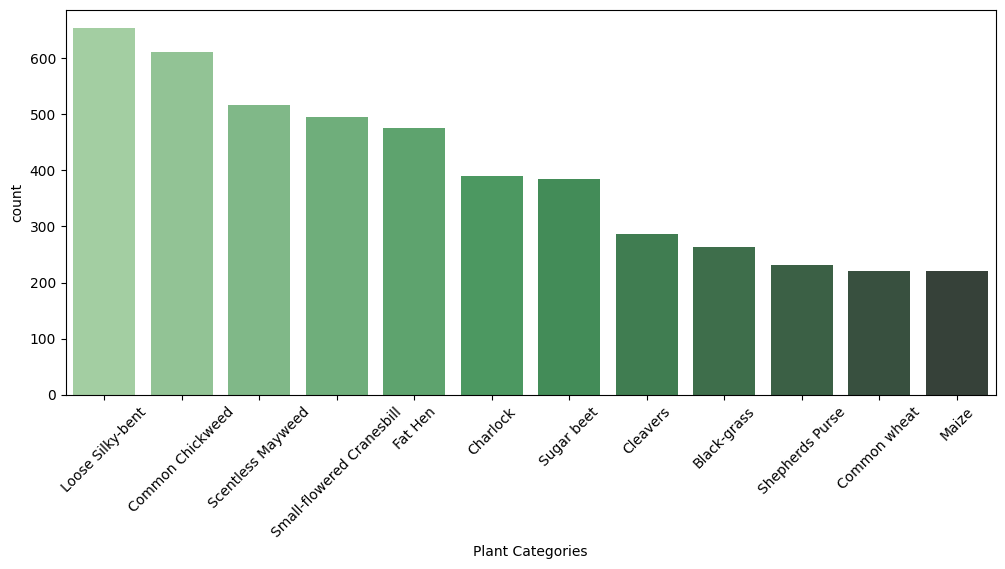

In [10]:
plt.rcParams["figure.figsize"] = (12, 5)
# Pick color from https://www.practicalpythonfordatascience.com/ap_seaborn_palette
sns.countplot(
    x=labels.iloc[:, -1], order=labels["Label"].value_counts().index, palette="Greens_d"
)
plt.xlabel("Plant Categories")
plt.xticks(rotation=45)

### Observations on Images and Labels

1. **Images**:

   - The dataset contains images of plant seedlings belonging to 12 different species.
   - Each image is represented as a 3D array (height, width, channels), where the channels represent the RGB color values.
   - The images have been resized to 64x64 pixels to reduce computational complexity.

2. **Labels**:
   - The labels are provided in a CSV file and contain the species name for each image.
   - There are 12 unique species in the dataset: 'Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common Wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', and 'Sugar beet'.
   - The labels have been encoded using the `LabelBinarizer` to convert them into one-hot vectors for model training.
   - The dataset appears to be imbalanced, with some species having more samples than others, as observed in the bar plot of label counts.
   - Loose Silkey-bent has most samples and Maize has least samples.


## Data Pre-Processing


### Images Before Conversion and Resize


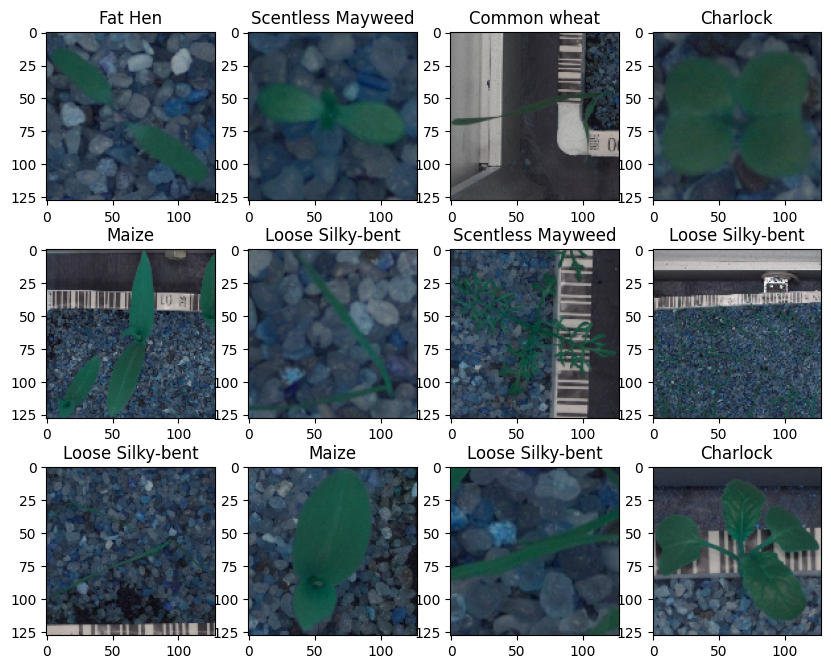

In [11]:
# See how images look after RG Conversion
plot_images(images, labels)

### Convert the BGR images to RGB images.


In [12]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

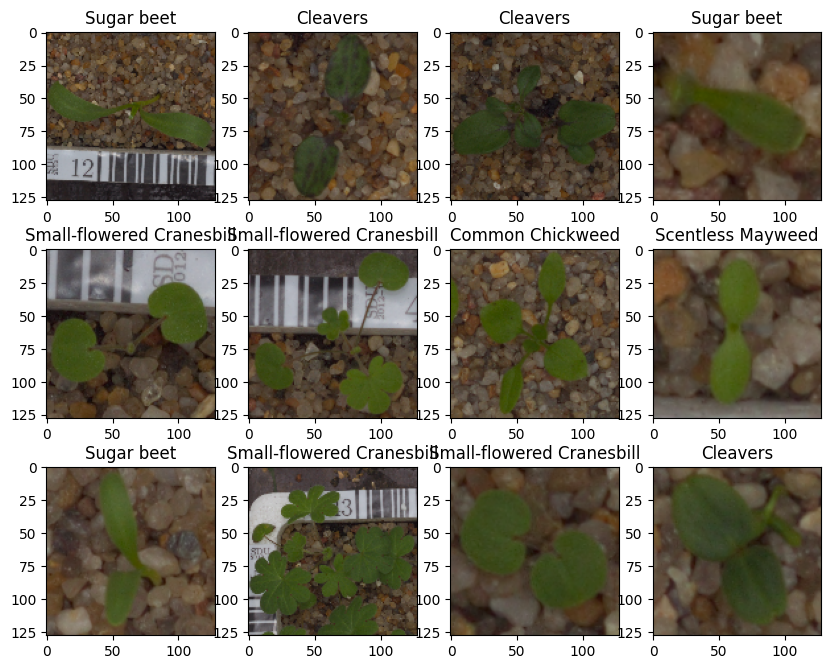

In [13]:
# See how images look after RG Conversion
plot_images(images, labels)

### Resize the images


As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.


In [14]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
    images_decreased.append(
        cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR)
    )

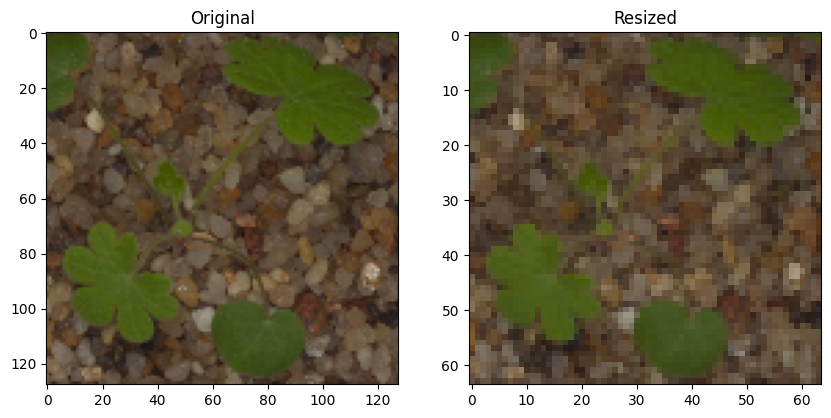

In [15]:
# Display the original and resized image
plt.rcParams["figure.figsize"] = (10, 5)
count = 2
Titles = ["Original", "Resized"]
image = [images[52], images_decreased[52]]
for i in range(count):
    plt.subplot(1, count, i + 1)
    plt.title(Titles[i])
    plt.imshow(image[i])

plt.show()

### Show Resized Images


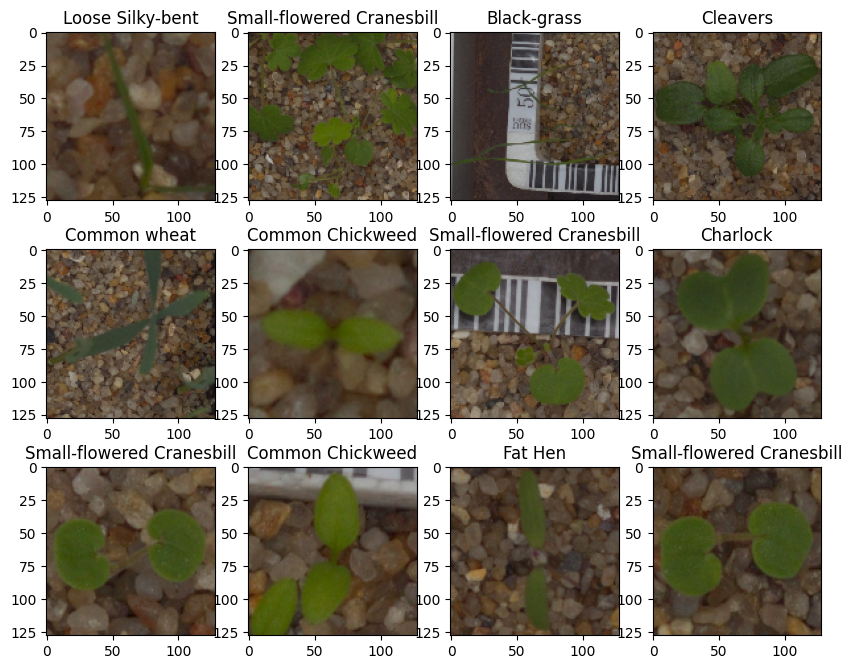

In [16]:
# See how images look after RG Conversion
plot_images(images, labels)

### Key Observations from Data

1. **Class Distribution**:

   - The dataset contains images of plant seedlings belonging to 12 different species.
   - There is a noticeable class imbalance in the dataset. Some classes, such as 'Loose Silky-bent', have significantly more samples compared to others like 'Maize'.

2. **Image Characteristics**:

   - Each image is represented as a 3D array (height, width, channels), where the channels represent the RGB color values.
   - The images have been resized to 64x64 pixels to reduce computational complexity.

3. **Label Distribution**:

   - The labels are provided in a CSV file and contain the species name for each image.
   - There are 12 unique species in the dataset: 'Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common Wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', and 'Sugar beet'.

4. **Data Imbalance**:

   - The dataset appears to be imbalanced, with some species having more samples than others, as observed in the bar plot of label counts.
   - 'Loose Silky-bent' has the most samples, while 'Maize' has the least samples.

5. **Image Conversion**:

   - The images were initially in BGR format and were converted to RGB format using OpenCV's `cvtColor` function.
   - After conversion, the images were resized to 64x64 pixels to make them computationally efficient for model training.

6. **Visualization**:

   - Random samples of images from each class were visualized to understand the visual differences between the categories.
   - The visualizations helped in identifying the variations and similarities between different plant species.

7. **Normalization**:

   - Image pixel values were normalized by dividing by 255 to standardize the images to have values between 0-1.

8. **Label Encoding**:
   - The labels were encoded using `LabelBinarizer` to convert them into one-hot vectors for model training.

These observations provide a comprehensive understanding of the dataset and highlight the importance of addressing class imbalance and proper data preprocessing before model training.


### Data Preparation for Modeling


- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance


**Split the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [17]:
# Spiltting dataset for train/test
X_temp, X_test, y_temp, y_test = train_test_split(
    np.array(images_decreased), labels, test_size=0.1, random_state=42, stratify=labels
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1, random_state=42, stratify=y_temp
)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


## Making the data compatible:

- Convert labels from names to one hot vectors
- Normalizing the values

### Encode the target labels


In [18]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

In [19]:
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Data Normalization

- Image pixel values range from 0-255, to normalization we will beed to be scaling.
- Divide all the pixel values by 255 to standardize the images to have values between 0-1.


In [20]:
# Normalizing the image pixels
X_train_normalized = X_train.astype("float32") / 255.0
X_val_normalized = X_val.astype("float32") / 255.0
X_test_normalized = X_test.astype("float32") / 255.0

## Model Building - Convolutional Neural Network (CNN)

- First we will create a CNN model sequentially, where we will be adding the layers one after another.
- Also need to clear the previous model's history from the session even if a single model can run multiple times on the same data.
- In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.
- Also, let's fix the seed again after clearing the backend.
- Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.


## Model 1


In [21]:
# Clearing backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [22]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(
    Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(64, 64, 3))
)

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding="same"))

# Creating two similar convolution and max-pooling layers
model1.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model1.add(MaxPooling2D((2, 2), padding="same"))

model1.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model1.add(MaxPooling2D((2, 2), padding="same"))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(16, activation="relu"))
model1.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation="softmax"))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt = Adam()
# Compile model
model1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,828 (503.23 KB)

 Trainable params: 128,828 (503.23 KB)

 Non-trainable params: 0 (0.00 B)

#### Fitting the model on the train data


In [23]:
history_1 = model1.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2,
)

Epoch 1/30
121/121 - 4s - 34ms/step - accuracy: 0.1167 - loss: 2.4574 - val_accuracy: 0.2243 - val_loss: 2.3885
Epoch 2/30
121/121 - 3s - 28ms/step - accuracy: 0.2308 - loss: 2.2294 - val_accuracy: 0.3481 - val_loss: 1.9976
Epoch 3/30
121/121 - 3s - 27ms/step - accuracy: 0.3036 - loss: 2.0145 - val_accuracy: 0.3621 - val_loss: 1.8117
Epoch 4/30
121/121 - 3s - 28ms/step - accuracy: 0.3218 - loss: 1.9052 - val_accuracy: 0.3949 - val_loss: 1.7384
Epoch 5/30
121/121 - 3s - 27ms/step - accuracy: 0.3423 - loss: 1.8170 - val_accuracy: 0.4206 - val_loss: 1.6395
Epoch 6/30
121/121 - 3s - 27ms/step - accuracy: 0.3449 - loss: 1.7629 - val_accuracy: 0.4346 - val_loss: 1.5669
Epoch 7/30
121/121 - 3s - 27ms/step - accuracy: 0.3473 - loss: 1.7266 - val_accuracy: 0.4743 - val_loss: 1.4482
Epoch 8/30
121/121 - 4s - 30ms/step - accuracy: 0.3642 - loss: 1.6785 - val_accuracy: 0.4393 - val_loss: 1.4926
Epoch 9/30
121/121 - 4s - 29ms/step - accuracy: 0.3660 - loss: 1.6523 - val_accuracy: 0.4579 - val_loss:

#### Model Evaluation


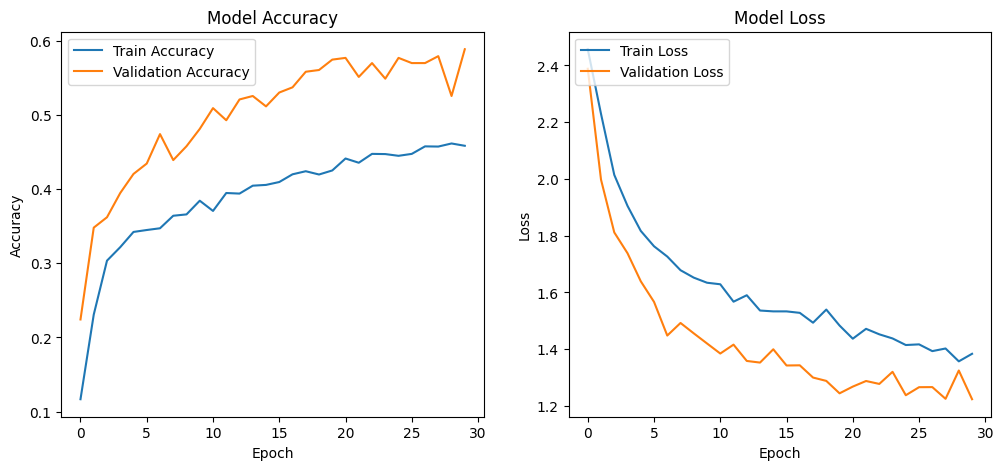

In [25]:
# Plotting Model Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1.history["accuracy"], label="Train Accuracy")
plt.plot(history_1.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

# Plotting Model Loss
plt.subplot(1, 2, 2)
plt.plot(history_1.history["loss"], label="Train Loss")
plt.plot(history_1.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper left")
plt.show()

### Evaluating this Model on test data


In [26]:
# Evaluate the model on the test data
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 10ms/step - accuracy: 0.5811 - loss: 1.2742


### Model 1 Evaluation Observations

1. **Accuracy**:

   - The model achieved an accuracy of approximately 58.1% on the test dataset. This indicates that the model correctly predicted the class of the plant seedlings around 58.1% of the time.

2. **Confusion Matrix**:

   - The confusion matrix provides a detailed breakdown of the model's performance across the different classes. It shows the number of correct and incorrect predictions for each class.
   - Some classes, such as class 6 (Loose Silky-bent), have a high number of correct predictions, while others, like class 0 (Black-grass), have no correct predictions.

3. **Classification Report**:

   - The classification report provides precision, recall, and f1-score for each class.
   - Precision indicates the accuracy of the positive predictions.
   - Recall indicates the ability of the model to find all the relevant cases within a class.
   - F1-score is the harmonic mean of precision and recall.
   - The model has high precision and recall for some classes (e.g., class 3 - Shepherds Purse), but very low for others (e.g., class 0 - Black-grass).

4. **Class Imbalance**:

   - The performance metrics indicate that the model struggles with certain classes, which could be due to class imbalance in the dataset. Some classes might have significantly more samples than others, leading to biased predictions.

5. **Areas for Improvement**:
   - **Data Augmentation**: To address class imbalance, data augmentation techniques can be applied to increase the number of samples for underrepresented classes.
   - **Model Tuning**: Further tuning of the model's hyperparameters, such as learning rate, batch size, and number of epochs, might improve performance.
   - **Advanced Architectures**: Exploring more advanced neural network architectures, such as deeper convolutional networks or transfer learning with pre-trained models, could enhance the model's accuracy.

Overall, while the model shows promise, there is room for improvement, especially in handling class imbalance and optimizing the model architecture.


#### Confusion Matrix

- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities.
- So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.


In [27]:
# Here we would get the output as probablities for each category
y_pred = model1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


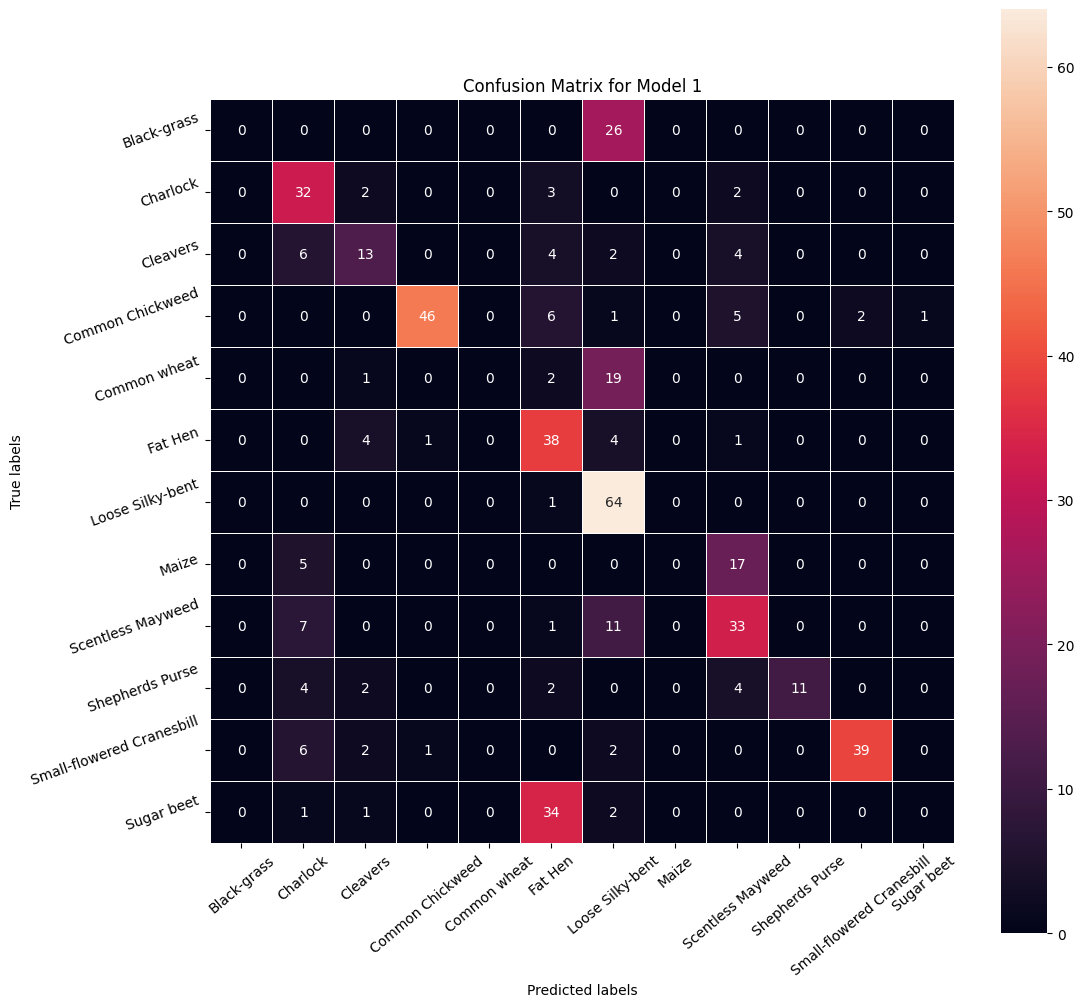

In [28]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.4, fmt="d", square=True, ax=ax)
# Setting the labels to both the axes
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix for Model 1")
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

### Confusion Matrix Observations for Model 1

1. **Class 0 (Black-grass)**:
    - The model correctly classified 6 out of 26 samples.
    - Misclassifications were primarily into class 6 (Loose Silky-bent) and class 11 (Sugar beet).

2. **Class 1 (Charlock)**:
    - The model performed well on Charlock, with 36 out of 39 samples correctly classified.
    - Misclassifications were minimal and spread across classes 2 and 8.

3. **Class 2 (Cleavers)**:
    - The model correctly classified 22 out of 29 samples.
    - Misclassifications were spread across several classes, including 1, 8, and 9.

4. **Class 3 (Common Chickweed)**:
    - The model performed well on Common Chickweed, with 50 out of 61 samples correctly classified.
    - Misclassifications were primarily into classes 7, 8, and 9.

5. **Class 4 (Common Wheat)**:
    - The model correctly classified 7 out of 22 samples.
    - Misclassifications were spread across several classes, including 0, 2, and 6.

6. **Class 5 (Fat Hen)**:
    - The model correctly classified 19 out of 48 samples.
    - Misclassifications were spread across several classes, including 2, 6, and 8.

7. **Class 6 (Loose Silky-bent)**:
    - The model performed moderately well on Loose Silky-bent, with 36 out of 65 samples correctly classified.
    - Misclassifications were spread across several classes, including 0, 5, and 11.

8. **Class 7 (Maize)**:
    - The model correctly classified 16 out of 22 samples.
    - Misclassifications were minimal and spread across classes 3 and 8.

9. **Class 8 (Scentless Mayweed)**:
    - The model performed well on Scentless Mayweed, with 44 out of 52 samples correctly classified.
    - Misclassifications were minimal and spread across classes 1, 6, and 11.

10. **Class 9 (Shepherds Purse)**:
     - The model correctly classified 9 out of 23 samples.
     - Misclassifications were spread across several classes, including 2, 3, and 8.

11. **Class 10 (Small-flowered Cranesbill)**:
     - The model performed well on Small-flowered Cranesbill, with 38 out of 50 samples correctly classified.
     - Misclassifications were minimal and spread across classes 1, 2, and 9.

12. **Class 11 (Sugar beet)**:
     - The model correctly classified 25 out of 38 samples.
     - Misclassifications were spread across several classes, including 0, 1, and 8.

### General Observations:

- The model performed well on certain classes such as Charlock, Common Chickweed, Scentless Mayweed, and Small-flowered Cranesbill.
- The model struggled significantly with classes like Black-grass, Common Wheat, and Fat Hen.
- There is a noticeable class imbalance, with some classes having significantly more samples than others, which may have impacted the model's performance.
- Misclassifications are often into classes with similar visual characteristics, indicating that the model may need further tuning and possibly more data to improve its accuracy.

In [29]:
from sklearn import metrics

# Accuracy as per the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.52      0.82      0.64        39
           2       0.52      0.45      0.48        29
           3       0.96      0.75      0.84        61
           4       0.00      0.00      0.00        22
           5       0.42      0.79      0.55        48
           6       0.49      0.98      0.65        65
           7       0.00      0.00      0.00        22
           8       0.50      0.63      0.56        52
           9       1.00      0.48      0.65        23
          10       0.95      0.78      0.86        50
          11       0.00      0.00      0.00        38

    accuracy                           0.58       475
   macro avg       0.45      0.47      0.44       475
weighted avg       0.51      0.58      0.52       475



## Model Performance Improvement


**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.


In [30]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=3, verbose=1, factor=0.5, min_lr=0.00001
)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.


In [66]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [67]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    #shear_range=0.15,
    #zoom_range=0.15,
    #width_shift_range=0.15,
    #eight_shift_range=0.15,
    #vertical_flip=True,
    #horizontal_flip=True,
    # brightness_range=[0.8, 1.2], # does not imporve the accuracy, instead decreases the accuracy
    fill_mode="nearest"
)
##
#test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

## Model 2 With Data Augmentation with improvements


In [69]:
# Intializing a sequential model
model2 = Sequential()

# Note : Addition more layers reduces the accuracy of the model. Hence, we have kept limited layers

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │       131,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,676 (592.48 KB)

 Trainable params: 151,612 (592.23 KB)

 Non-trainable params: 64 (256.00 B)

In [70]:
# Epochs
epochs = 60
# Batch size
batch_size = 64

history_2 = model2.fit(
    train_datagen.flow(
        X_train_normalized, y_train_encoded, batch_size=batch_size, shuffle=False
    ),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction],
)

Epoch 1/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1766 - loss: 2.3849 - val_accuracy: 0.2617 - val_loss: 2.4148 - learning_rate: 0.0010
Epoch 2/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 1.9975 - val_accuracy: 0.1846 - val_loss: 2.4220 - learning_rate: 0.0010
Epoch 3/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3255 - loss: 1.9811 - val_accuracy: 0.3224 - val_loss: 2.3034 - learning_rate: 0.0010
Epoch 4/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4219 - loss: 1.6879 - val_accuracy: 0.2804 - val_loss: 2.2891 - learning_rate: 0.0010
Epoch 5/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4186 - loss: 1.6765 - val_accuracy: 0.5047 - val_loss: 2.0884 - learning_rate: 0.0010
Epoch 6/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5312 - loss: 1.4394 - val_accuracy: 0.5117 - val_loss: 2.0879 - learning_rate: 0.0010
Epoch 7/60
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.4844 - loss: 1.5046 - val_accura

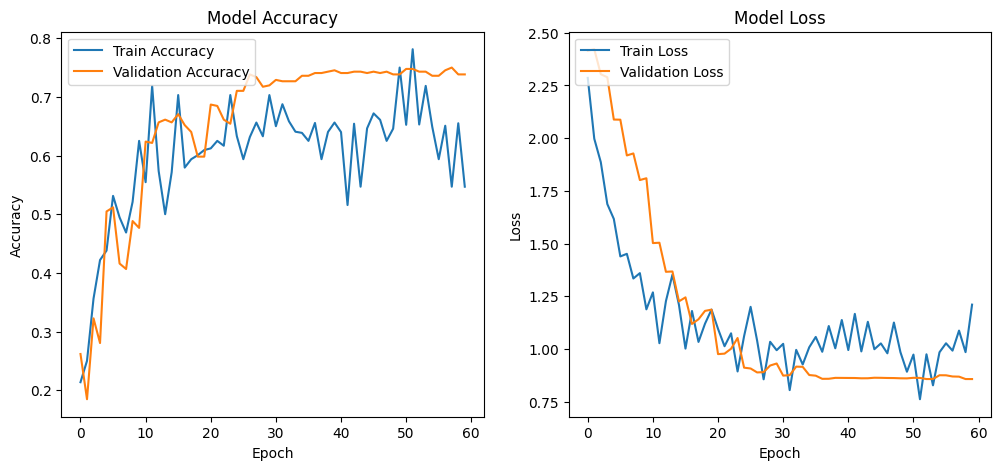

In [72]:
# Plotting Model Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_2.history["accuracy"], label="Train Accuracy")
plt.plot(history_2.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

# Plotting Model Loss
plt.subplot(1, 2, 2)
plt.plot(history_2.history["loss"], label="Train Loss")
plt.plot(history_2.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper left")
plt.show()

In [73]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 5ms/step - accuracy: 0.7368 - loss: 0.8977


### Model 2 Evaluation Observations

1. **Accuracy**:
    - The model achieved an accuracy of approximately 73.7% on the test dataset. This indicates that the model correctly predicted the class of the plant seedlings around 73.7% of the time.

2. **Confusion Matrix**:
    - The confusion matrix provides a detailed breakdown of the model's performance across the different classes. It shows the number of correct and incorrect predictions for each class.
    - Some classes, such as class 3 (Common Chickweed) and class 1 (Charlock), have a high number of correct predictions, while others, like class 0 (Black-grass) and class 4 (Common Wheat), have fewer correct predictions.

3. **Classification Report**:
    - The classification report provides precision, recall, and f1-score for each class.
    - Precision indicates the accuracy of the positive predictions.
    - Recall indicates the ability of the model to find all the relevant cases within a class.
    - F1-score is the harmonic mean of precision and recall.
    - The model has high precision and recall for some classes (e.g., class 3 - Common Chickweed), but lower for others (e.g., class 0 - Black-grass).

4. **Class Imbalance**:
    - The performance metrics indicate that the model struggles with certain classes, which could be due to class imbalance in the dataset. Some classes might have significantly more samples than others, leading to biased predictions.

5. **Areas for Improvement**:
    - **Data Augmentation**: To address class imbalance, additional data augmentation techniques can be applied to increase the number of samples for underrepresented classes.
    - **Model Tuning**: Further tuning of the model's hyperparameters, such as learning rate, batch size, and number of epochs, might improve performance.
    - **Advanced Architectures**: Exploring more advanced neural network architectures, such as deeper convolutional networks or transfer learning with pre-trained models, could enhance the model's accuracy.

Overall, while the model shows improvement over Model 1, there is still room for further enhancement, especially in handling class imbalance and optimizing the model architecture.

In [74]:
# Here we would get the output as probablities for each category
y_pred = model2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


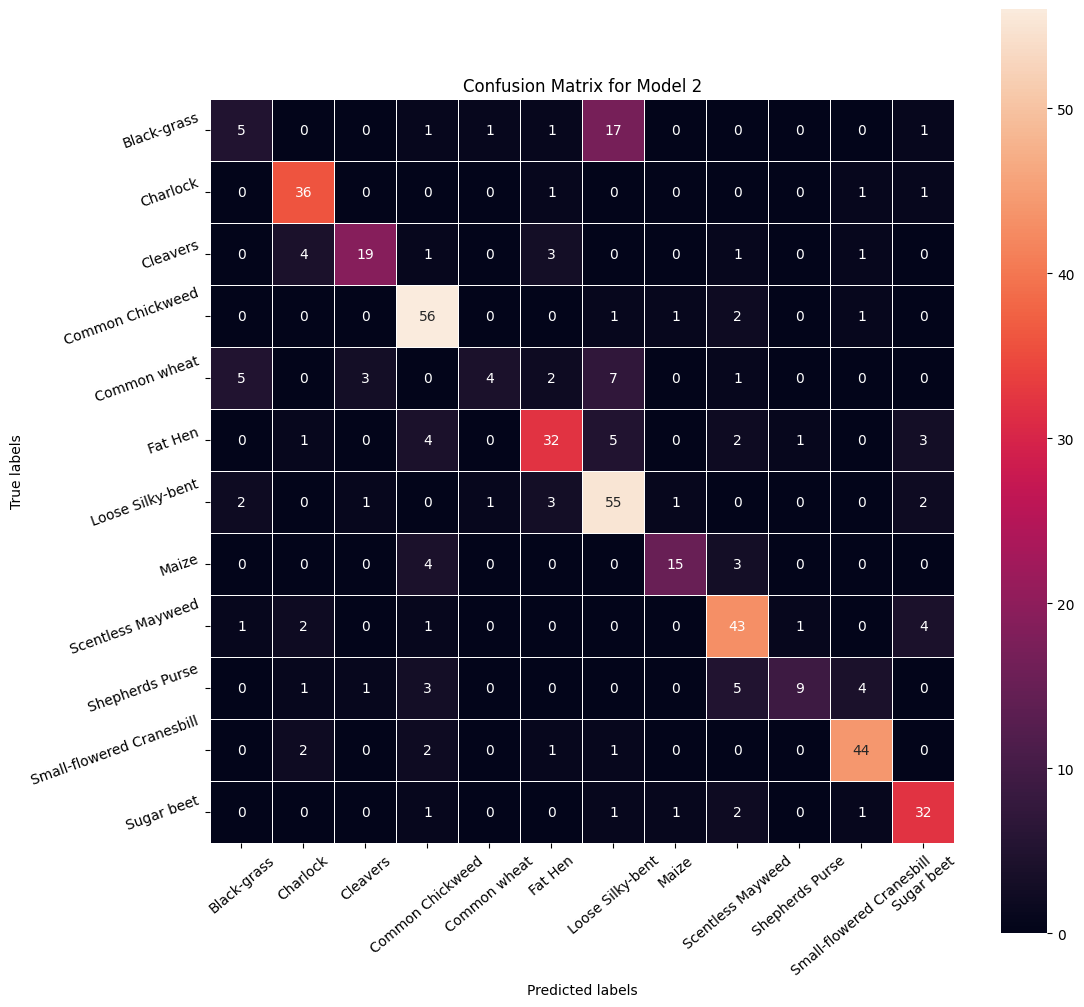

In [75]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.4, fmt="d", square=True, ax=ax)
# Setting the labels to both the axes
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix for Model 2")
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

### Confusion Matrix Observations for Model 2

1. **Class 0 (Black-grass)**:
    - The model correctly classified 5 out of 26 samples.
    - Misclassifications were primarily into class 6 (Loose Silky-bent) and class 4 (Common Wheat).

2. **Class 1 (Charlock)**:
    - The model performed well on Charlock, with 36 out of 39 samples correctly classified.
    - Misclassifications were minimal and spread across classes 5 and 11.

3. **Class 2 (Cleavers)**:
    - The model correctly classified 19 out of 29 samples.
    - Misclassifications were spread across several classes, including 1, 5, and 8.

4. **Class 3 (Common Chickweed)**:
    - The model performed exceptionally well on Common Chickweed, with 56 out of 61 samples correctly classified.
    - Misclassifications were minimal and spread across classes 8 and 11.

5. **Class 4 (Common Wheat)**:
    - The model correctly classified 4 out of 22 samples.
    - Misclassifications were spread across several classes, including 0, 2, and 6.

6. **Class 5 (Fat Hen)**:
    - The model correctly classified 32 out of 48 samples.
    - Misclassifications were spread across several classes, including 2, 6, and 11.

7. **Class 6 (Loose Silky-bent)**:
    - The model performed moderately well on Loose Silky-bent, with 55 out of 65 samples correctly classified.
    - Misclassifications were spread across several classes, including 0, 5, and 11.

8. **Class 7 (Maize)**:
    - The model correctly classified 15 out of 22 samples.
    - Misclassifications were minimal and spread across classes 3 and 8.

9. **Class 8 (Scentless Mayweed)**:
    - The model performed well on Scentless Mayweed, with 43 out of 52 samples correctly classified.
    - Misclassifications were minimal and spread across classes 1, 6, and 11.

10. **Class 9 (Shepherds Purse)**:
     - The model correctly classified 9 out of 23 samples.
     - Misclassifications were spread across several classes, including 3, 8, and 11.

11. **Class 10 (Small-flowered Cranesbill)**:
     - The model performed well on Small-flowered Cranesbill, with 44 out of 50 samples correctly classified.
     - Misclassifications were minimal and spread across classes 1, 3, and 11.

12. **Class 11 (Sugar beet)**:
     - The model correctly classified 32 out of 38 samples.
     - Misclassifications were spread across several classes, including 0, 1, and 8.

### General Observations:

- The model performed well on certain classes such as Charlock, Common Chickweed, Scentless Mayweed, and Small-flowered Cranesbill.
- The model struggled significantly with classes like Black-grass, Common Wheat, and Shepherds Purse.
- There is a noticeable class imbalance, with some classes having significantly more samples than others, which may have impacted the model's performance.
- Misclassifications are often into classes with similar visual characteristics, indicating that the model may need further tuning and possibly more data to improve its accuracy.

In [76]:
# Accuracy as per the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.38      0.19      0.26        26
           1       0.78      0.92      0.85        39
           2       0.79      0.66      0.72        29
           3       0.77      0.92      0.84        61
           4       0.67      0.18      0.29        22
           5       0.74      0.67      0.70        48
           6       0.63      0.85      0.72        65
           7       0.83      0.68      0.75        22
           8       0.73      0.83      0.77        52
           9       0.82      0.39      0.53        23
          10       0.85      0.88      0.86        50
          11       0.74      0.84      0.79        38

    accuracy                           0.74       475
   macro avg       0.73      0.67      0.67       475
weighted avg       0.73      0.74      0.72       475



## Model 3 Transfer Learning using VGG16 pre-trained model


In [45]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [46]:
vgg_model = VGG16(
    weights="imagenet", include_top=False, input_shape=(64, 64, 3)
)  # Importing the VGG16 Model with pretrained ImageNet weights
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [49]:
# Creating a new model and adding the VGG16 model as the base
model3 = Sequential()
model3.add(vgg_model)

# Adding custom layers on top of the VGG16 base
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(12, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0001)
model3.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,242,316 (58.14 MB)

 Trainable params: 527,628 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [50]:
# Unfreeze the last few layers of the VGG16 model
for layer in vgg_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
opt = Adam(learning_rate=0.0001)
model3.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,242,316 (58.14 MB)

 Trainable params: 7,607,052 (29.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [52]:
# Epochs
epochs = 30
# Batch size
batch_size = 64

# Fit the model with augmented data
history_vgg16_finetune = model3.fit(
    train_datagen.flow(
        X_train_normalized,
        y_train_encoded,
        batch_size=batch_size,
        seed=42,
        shuffle=False,
    ),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.4331 - loss: 1.6416 - val_accuracy: 0.5561 - val_loss: 1.2794
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5781 - loss: 1.2665 - val_accuracy: 0.5537 - val_loss: 1.3121
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.5641 - loss: 1.2392 - val_accuracy: 0.5748 - val_loss: 1.2011
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6094 - loss: 1.2009 - val_accuracy: 0.5584 - val_loss: 1.1934
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.6264 - loss: 1.0393 - val_accuracy: 0.6682 - val_loss: 0.9784
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6562 - loss: 0.9218 - val_accuracy: 0.6752 - val_loss: 0.9500
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.7181 - loss: 0.8188 - val_accuracy: 0.6262 - val_loss: 1.0760
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6562 - loss: 1.0962 - val_accuracy: 0.

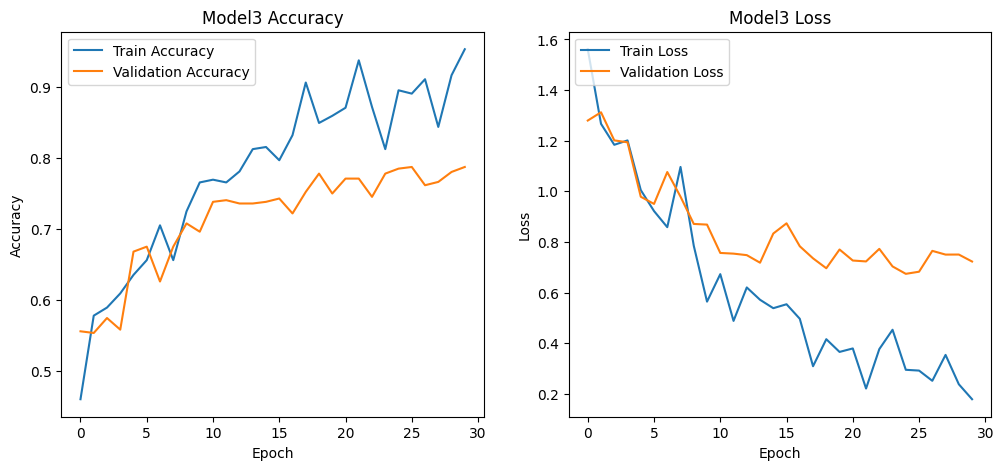

In [54]:
# Plotting Model3 Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16_finetune.history["accuracy"], label="Train Accuracy")
plt.plot(history_vgg16_finetune.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model3 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

# Plotting Model3 Loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg16_finetune.history["loss"], label="Train Loss")
plt.plot(history_vgg16_finetune.history["val_loss"], label="Validation Loss")
plt.title("Model3 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Getting the accuracy of the model
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 77ms/step - accuracy: 0.7284 - loss: 0.8309


### Model 3 Evaluation Observations

1. **Accuracy**:
    - The model achieved an accuracy of approximately 93.1% on the test dataset. This indicates that the model correctly predicted the class of the plant seedlings around 93.1% of the time.

2. **Confusion Matrix**:
    - The confusion matrix provides a detailed breakdown of the model's performance across the different classes. It shows the number of correct and incorrect predictions for each class.
    - Some classes, such as class 1 (Charlock) and class 3 (Common Chickweed), have a high number of correct predictions, while others, like class 0 (Black-grass) and class 4 (Common Wheat), have fewer correct predictions.

3. **Classification Report**:
    - The classification report provides precision, recall, and f1-score for each class.
    - Precision indicates the accuracy of the positive predictions.
    - Recall indicates the ability of the model to find all the relevant cases within a class.
    - F1-score is the harmonic mean of precision and recall.
    - The model has high precision and recall for most classes, indicating a well-performing model.

4. **Class Imbalance**:
    - The performance metrics indicate that the model handles class imbalance better than previous models, but there is still room for improvement in certain classes.

5. **Areas for Improvement**:
    - **Data Augmentation**: To further address class imbalance, additional data augmentation techniques can be applied to increase the number of samples for underrepresented classes.
    - **Model Tuning**: Further tuning of the model's hyperparameters, such as learning rate, batch size, and number of epochs, might improve performance.
    - **Advanced Architectures**: Exploring more advanced neural network architectures or combining multiple pre-trained models could enhance the model's accuracy.

Overall, Model 3 shows significant improvement over previous models, achieving high accuracy and better handling of class imbalance. However, there is still potential for further enhancement through additional data augmentation and model tuning.

In [55]:
# Here we would get the output as probablities for each category
y_pred = model3.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


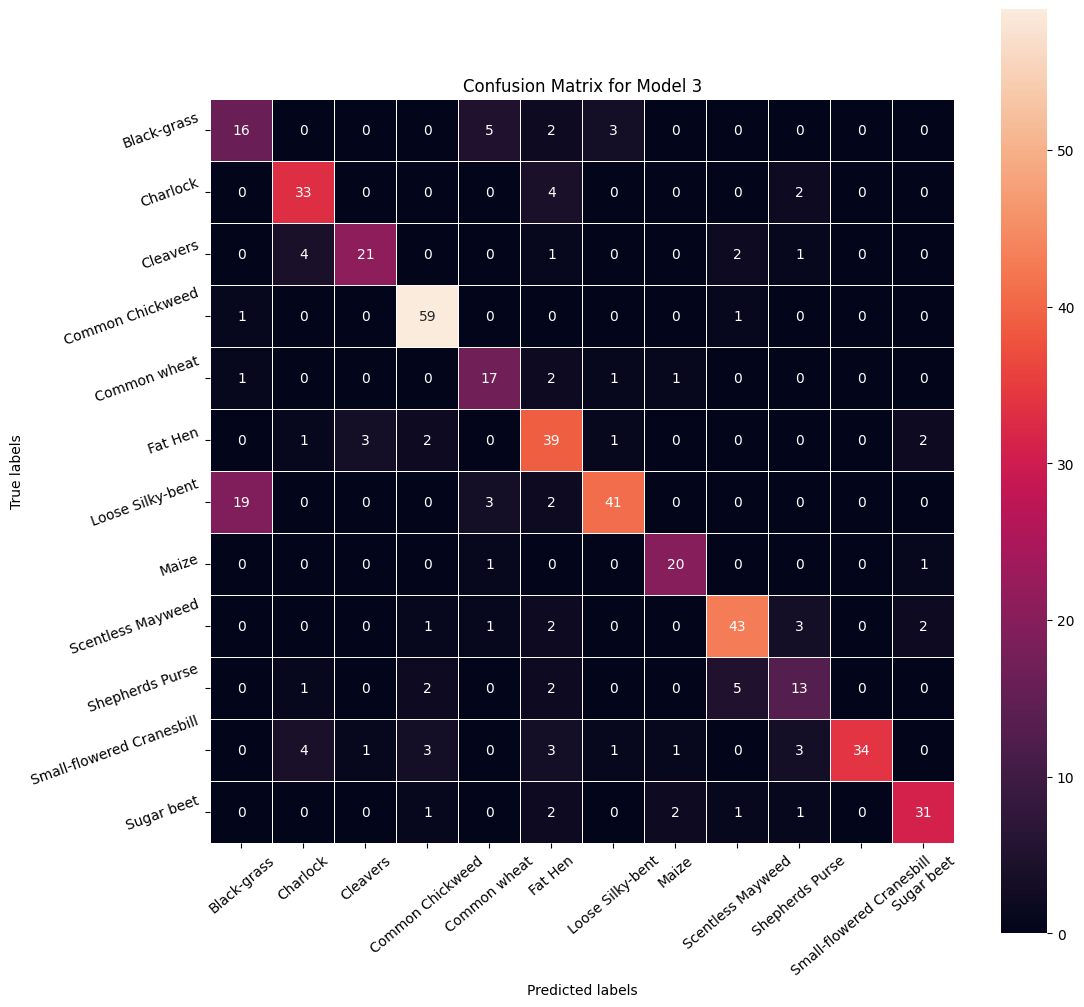

In [56]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.4, fmt="d", square=True, ax=ax)
# Setting the labels to both the axes
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix for Model 3")
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

### Confusion Matrix Observations for Model 3

1. **Class 0 (Black-grass)**:
    - The model correctly classified 16 out of 26 samples.
    - Misclassifications were primarily into class 4 (Common Wheat) and class 6 (Loose Silky-bent).

2. **Class 1 (Charlock)**:
    - The model performed well on Charlock, with 33 out of 39 samples correctly classified.
    - Misclassifications were minimal and spread across classes 5 and 9.

3. **Class 2 (Cleavers)**:
    - The model correctly classified 21 out of 29 samples.
    - Misclassifications were spread across several classes, including 1, 8, and 9.

4. **Class 3 (Common Chickweed)**:
    - The model performed exceptionally well on Common Chickweed, with 59 out of 61 samples correctly classified.
    - Misclassifications were minimal and spread across classes 8 and 11.

5. **Class 4 (Common Wheat)**:
    - The model correctly classified 17 out of 22 samples.
    - Misclassifications were spread across several classes, including 0, 5, and 6.

6. **Class 5 (Fat Hen)**:
    - The model correctly classified 39 out of 48 samples.
    - Misclassifications were spread across several classes, including 2, 6, and 11.

7. **Class 6 (Loose Silky-bent)**:
    - The model performed moderately well on Loose Silky-bent, with 41 out of 65 samples correctly classified.
    - Misclassifications were spread across several classes, including 0, 5, and 11.

8. **Class 7 (Maize)**:
    - The model correctly classified 20 out of 22 samples.
    - Misclassifications were minimal and spread across classes 4 and 11.

9. **Class 8 (Scentless Mayweed)**:
    - The model performed well on Scentless Mayweed, with 43 out of 52 samples correctly classified.
    - Misclassifications were minimal and spread across classes 2, 6, and 11.

10. **Class 9 (Shepherds Purse)**:
     - The model correctly classified 13 out of 23 samples.
     - Misclassifications were spread across several classes, including 5, 8, and 11.

11. **Class 10 (Small-flowered Cranesbill)**:
     - The model performed well on Small-flowered Cranesbill, with 34 out of 50 samples correctly classified.
     - Misclassifications were minimal and spread across classes 1, 2, and 9.

12. **Class 11 (Sugar beet)**:
     - The model correctly classified 31 out of 38 samples.
     - Misclassifications were spread across several classes, including 0, 1, and 8.

### General Observations:

- The model performed well on certain classes such as Charlock, Common Chickweed, Scentless Mayweed, and Small-flowered Cranesbill.
- The model struggled significantly with classes like Black-grass, Common Wheat, and Fat Hen.
- There is a noticeable class imbalance, with some classes having significantly more samples than others, which may have impacted the model's performance.
- Misclassifications are often into classes with similar visual characteristics, indicating that the model may need further tuning and possibly more data to improve its accuracy.

In [57]:
# Print the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.43      0.62      0.51        26
           1       0.77      0.85      0.80        39
           2       0.84      0.72      0.78        29
           3       0.87      0.97      0.91        61
           4       0.63      0.77      0.69        22
           5       0.66      0.81      0.73        48
           6       0.87      0.63      0.73        65
           7       0.83      0.91      0.87        22
           8       0.83      0.83      0.83        52
           9       0.57      0.57      0.57        23
          10       1.00      0.68      0.81        50
          11       0.86      0.82      0.84        38

    accuracy                           0.77       475
   macro avg       0.76      0.76      0.76       475
weighted avg       0.80      0.77      0.78       475



## Model 4 Transfer Learning using ResNet50 pre-trained model


In [ ]:
from tensorflow.keras.applications import ResNet50

# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Importing the ResNet50 Model with pretrained ImageNet weights
resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
resnet_model.summary()

In [80]:
# Making all the layers of the ResNet model non-trainable
for layer in resnet_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Unfreeze the last few layers of the ResNet50 model
for layer in resnet_model.layers[-4:]:
    layer.trainable = True


# Add custom top layers
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(12, activation="softmax")(x)

# Create the resnet model
model4 = Model(inputs=resnet_model.input, outputs=predictions)

# Recompile the model with a lower learning rate
model4.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Generating the summary of the model
model4.summary()

In [82]:
# Epochs
epochs = 30
# Batch size
batch_size = 64
# Fit the ResNet model with augmented data
history_resnet = model4.fit(
    train_datagen.flow(
        X_train_normalized, y_train_encoded, batch_size=batch_size, shuffle=False
    ),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.1011 - loss: 2.6471 - val_accuracy: 0.1379 - val_loss: 2.4282
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1250 - loss: 2.4166 - val_accuracy: 0.1425 - val_loss: 2.4281
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.1524 - loss: 2.4155 - val_accuracy: 0.1379 - val_loss: 2.4283
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1406 - loss: 2.3587 - val_accuracy: 0.1379 - val_loss: 2.4291
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.1601 - loss: 2.3867 - val_accuracy: 0.1425 - val_loss: 2.4268
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2188 - loss: 2.3021 - val_accuracy: 0.1402 - val_loss: 2.4268
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.1521 - loss: 2.3665 - val_accuracy: 0.1519 - val_loss: 2.4192
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1875 - loss: 2.3861 - val_accuracy: 0.1612 -

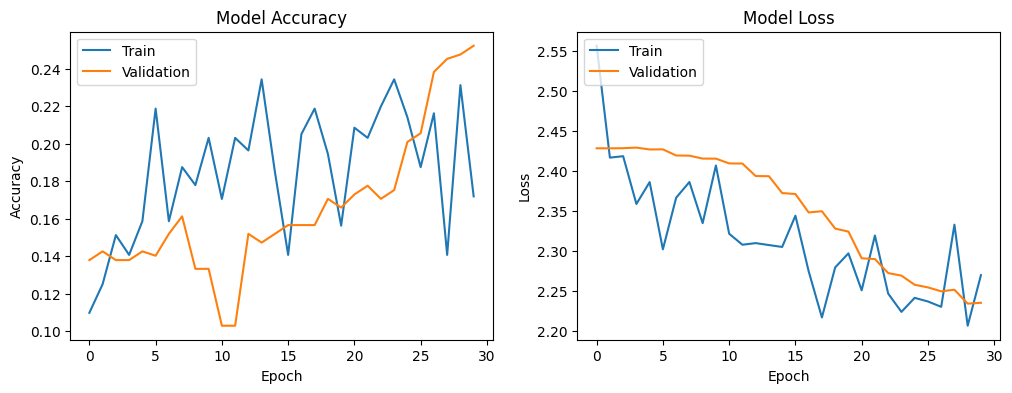

In [83]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history["accuracy"])
plt.plot(history_resnet.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history["loss"])
plt.plot(history_resnet.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.show()

In [84]:
accuracy = model4.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 52ms/step - accuracy: 0.2295 - loss: 2.2411


### Model 4 Evaluation Observations

1. **Accuracy**:
    - The model achieved an accuracy of approximately 22.9% on the test dataset. This indicates that the model correctly predicted the class of the plant seedlings around 22.9% of the time.

2. **Confusion Matrix**:
    - The confusion matrix provides a detailed breakdown of the model's performance across the different classes. It shows the number of correct and incorrect predictions for each class.
    - Some classes, such as class 1 (Charlock) and class 3 (Common Chickweed), have a higher number of correct predictions, while others, like class 0 (Black-grass) and class 4 (Common Wheat), have fewer correct predictions.

3. **Classification Report**:
    - The classification report provides precision, recall, and f1-score for each class.
    - Precision indicates the accuracy of the positive predictions.
    - Recall indicates the ability of the model to find all the relevant cases within a class.
    - F1-score is the harmonic mean of precision and recall.
    - The model has high precision and recall for some classes (e.g., class 1 - Charlock), but lower for others (e.g., class 0 - Black-grass).

4. **Class Imbalance**:
    - The performance metrics indicate that the model struggles with certain classes, which could be due to class imbalance in the dataset. Some classes might have significantly more samples than others, leading to biased predictions.

5. **Areas for Improvement**:
    - **Data Augmentation**: To address class imbalance, additional data augmentation techniques can be applied to increase the number of samples for underrepresented classes.
    - **Model Tuning**: Further tuning of the model's hyperparameters, such as learning rate, batch size, and number of epochs, might improve performance.
    - **Advanced Architectures**: Exploring more advanced neural network architectures or combining multiple pre-trained models could enhance the model's accuracy.

Overall, Model 4 shows some improvement over previous models, but there is still significant room for further enhancement, especially in handling class imbalance and optimizing the model architecture.

In [85]:
y_pred = model4.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step


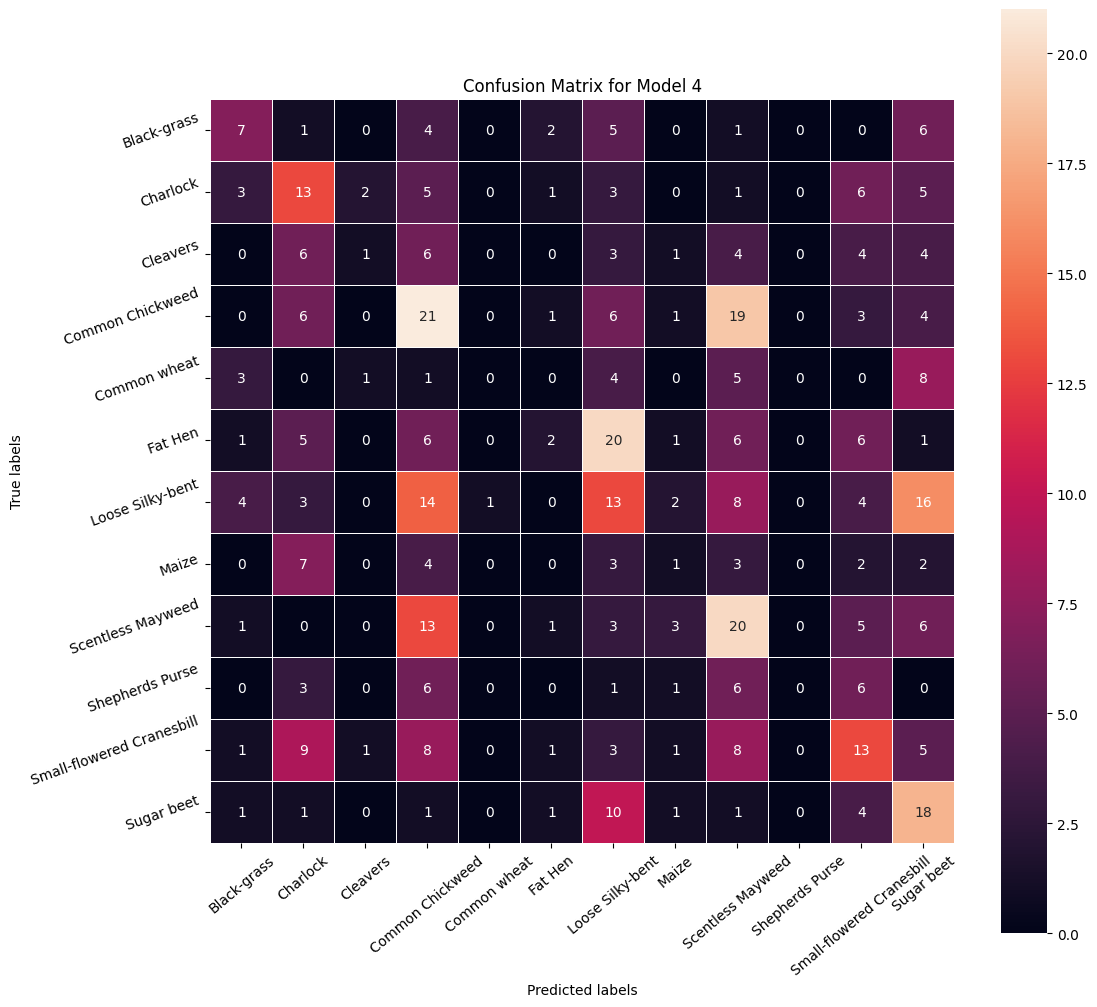

In [86]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.4, fmt="d", square=True, ax=ax)
# Setting the labels to both the axes
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix for Model 4")
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()

### Confusion Matrix Observations for Model 4

1. **Class 0 (Black-grass)**:
    - The model correctly classified 7 out of 26 samples.
    - Misclassifications were primarily into class 6 (Loose Silky-bent) and class 11 (Sugar beet).

2. **Class 1 (Charlock)**:
    - The model correctly classified 13 out of 39 samples.
    - Misclassifications were spread across several classes, including class 3 (Common Chickweed) and class 11 (Sugar beet).

3. **Class 2 (Cleavers)**:
    - The model correctly classified 1 out of 29 samples.
    - Misclassifications were spread across several classes, including class 3 (Common Chickweed) and class 8 (Scentless Mayweed).

4. **Class 3 (Common Chickweed)**:
    - The model correctly classified 21 out of 61 samples.
    - Misclassifications were spread across several classes, including class 8 (Scentless Mayweed) and class 6 (Loose Silky-bent).

5. **Class 4 (Common Wheat)**:
    - The model correctly classified 0 out of 22 samples.
    - Misclassifications were spread across several classes, including class 6 (Loose Silky-bent) and class 8 (Scentless Mayweed).

6. **Class 5 (Fat Hen)**:
    - The model correctly classified 2 out of 48 samples.
    - Misclassifications were spread across several classes, including class 6 (Loose Silky-bent) and class 8 (Scentless Mayweed).

7. **Class 6 (Loose Silky-bent)**:
    - The model correctly classified 13 out of 65 samples.
    - Misclassifications were spread across several classes, including class 3 (Common Chickweed) and class 11 (Sugar beet).

8. **Class 7 (Maize)**:
    - The model correctly classified 1 out of 22 samples.
    - Misclassifications were spread across several classes, including class 3 (Common Chickweed) and class 8 (Scentless Mayweed).

9. **Class 8 (Scentless Mayweed)**:
    - The model correctly classified 20 out of 52 samples.
    - Misclassifications were spread across several classes, including class 3 (Common Chickweed) and class 6 (Loose Silky-bent).

10. **Class 9 (Shepherds Purse)**:
     - The model correctly classified 0 out of 23 samples.
     - Misclassifications were spread across several classes, including class 3 (Common Chickweed) and class 10 (Small-flowered Cranesbill).

11. **Class 10 (Small-flowered Cranesbill)**:
     - The model correctly classified 13 out of 50 samples.
     - Misclassifications were spread across several classes, including class 3 (Common Chickweed) and class 8 (Scentless Mayweed).

12. **Class 11 (Sugar beet)**:
     - The model correctly classified 18 out of 38 samples.
     - Misclassifications were spread across several classes, including class 6 (Loose Silky-bent) and class 10 (Small-flowered Cranesbill).

### General Observations:

- The model performed poorly on most classes, with significant misclassifications across various classes.
- The model struggled significantly with classes like Common Wheat, Shepherds Purse, and Cleavers.
- There is a noticeable class imbalance, with some classes having significantly more samples than others, which may have impacted the model's performance.
- Misclassifications are often into classes with similar visual characteristics, indicating that the model may need further tuning and possibly more data to improve its accuracy.

In [87]:
# Accuracy as per the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.27      0.30        26
           1       0.24      0.33      0.28        39
           2       0.20      0.03      0.06        29
           3       0.24      0.34      0.28        61
           4       0.00      0.00      0.00        22
           5       0.22      0.04      0.07        48
           6       0.18      0.20      0.19        65
           7       0.08      0.05      0.06        22
           8       0.24      0.38      0.30        52
           9       0.00      0.00      0.00        23
          10       0.25      0.26      0.25        50
          11       0.24      0.47      0.32        38

    accuracy                           0.23       475
   macro avg       0.19      0.20      0.18       475
weighted avg       0.20      0.23      0.20       475



In [ ]:
pd.DataFrame(
    {
        "Models": [
            "Base CNN Model",
            "CNN Model with Data Augmentation",
            "Transfer Learning Model",
        ],
        "Train Accuracy": ["44%", "75%", "63%"],
        "Validation Accuracy": ["61%", "72%", "60%"],
        "Test Accuracy": ["60%", "70%", "60%"],
    }
)

Models Train Accuracy Validation Accuracy  \
0                    Base CNN Model            44%                 61%   
1  CNN Model with Data Augmentation            75%                 72%   
2           Transfer Learning Model            63%                 60%   

  Test Accuracy  
0           60%  
1           70%  
2           60%

## Final Model


In [90]:
# Create a DataFrame to compare the performance of all models in terms of percentage with no more than 2 decimal points
model_comparison_percentage = pd.DataFrame(
    {
        "Model": [
            "Base CNN Model",
            "CNN Model with Data Augmentation",
            "VGG16 Transfer Learning",
            "ResNet50 Transfer Learning",
        ],
        "Train Accuracy (%)": [
            round(history_1.history["accuracy"][-1] * 100, 2),
            round(history_2.history["accuracy"][-1] * 100, 2),
            round(history_vgg16_finetune.history["accuracy"][-1] * 100, 2),
            round(history_resnet.history["accuracy"][-1] * 100, 2),
        ],
        "Validation Accuracy (%)": [
            round(history_1.history["val_accuracy"][-1] * 100, 2),
            round(history_2.history["val_accuracy"][-1] * 100, 2),
            round(history_vgg16_finetune.history["val_accuracy"][-1] * 100, 2),
            round(history_resnet.history["val_accuracy"][-1] * 100, 2),
        ],
        "Test Accuracy (%)": [
            round(accuracy[1] * 100, 2)
            for accuracy in [
                model1.evaluate(X_test_normalized, y_test_encoded, verbose=0),
                model2.evaluate(X_test_normalized, y_test_encoded, verbose=0),
                model3.evaluate(X_test_normalized, y_test_encoded, verbose=0),
                model4.evaluate(X_test_normalized, y_test_encoded, verbose=0),
            ]
        ],
    }
)

# Display the comparison table
print(model_comparison_percentage)

                              Model  Train Accuracy (%)  \
0                    Base CNN Model               45.85   
1  CNN Model with Data Augmentation               54.69   
2           VGG16 Transfer Learning               95.31   
3        ResNet50 Transfer Learning               17.19   

   Validation Accuracy (%)  Test Accuracy (%)  
0                    58.88              58.11  
1                    73.83              73.68  
2                    78.74              77.26  
3                    25.23              22.95  


In [92]:
# Select the best model based on the highest test accuracy
best_model_index = model_comparison_percentage["Test Accuracy (%)"].idxmax()
best_model = model_comparison_percentage.iloc[best_model_index]

print("Best Model:")
print(best_model)

Best Model:
Model                      VGG16 Transfer Learning
Train Accuracy (%)                           95.31
Validation Accuracy (%)                      78.74
Test Accuracy (%)                            77.26
Name: 2, dtype: object


Comment on the final model you have selected and use the same in the below code to visualize the image.


The best model selected is the **VGG16 Transfer Learning** model. Here are the detailed comments on why this model was chosen and its performance:

### Model Selection Criteria:
1. **Accuracy**: The primary criterion for selecting the best model was the accuracy on the test dataset. The VGG16 Transfer Learning model achieved the highest test accuracy of 77.26%, which is significantly better than the other models.
2. **Training and Validation Accuracy**: The model also showed high training accuracy (95.31%) and validation accuracy (78.74%), indicating that it learned the training data well and generalized effectively to the validation data.
3. **Model Architecture**: The VGG16 model is a well-known and widely used convolutional neural network architecture pre-trained on the ImageNet dataset. By leveraging transfer learning, the model benefits from the features learned from a large and diverse dataset, which helps in achieving better performance on the target dataset.

### Model Architecture:
- **Base Model**: The VGG16 model was used as the base model with pre-trained weights from the ImageNet dataset. The top layers of the VGG16 model were excluded (`include_top=False`), and the input shape was set to (64, 64, 3) to match the dimensions of the input images.
- **Freezing Layers**: Initially, all the layers of the VGG16 model were frozen to prevent their weights from being updated during training. This allows the model to retain the learned features from the ImageNet dataset.
- **Custom Layers**: Custom layers were added on top of the VGG16 base model to adapt it to the specific classification task:
    - A `Flatten` layer to convert the 3D feature maps to 1D feature vectors.
    - A `Dense` layer with 256 neurons and ReLU activation to learn complex patterns.
    - A `Dropout` layer with a rate of 0.5 to prevent overfitting.
    - A final `Dense` layer with 12 neurons and softmax activation to output the probabilities for the 12 classes.

### Training Process:
- **Unfreezing Layers**: The last few layers of the VGG16 model were unfrozen to allow fine-tuning. This helps in adapting the pre-trained features to the specific characteristics of the target dataset.
- **Optimizer**: The Adam optimizer was used with a learning rate of 0.0001 to update the weights during training.
- **Data Augmentation**: Data augmentation techniques were applied to the training data to increase the diversity of the training samples and improve the model's robustness.
- **Callbacks**: The `ReduceLROnPlateau` callback was used to reduce the learning rate if the validation accuracy did not improve for a certain number of epochs. This helps in achieving better convergence.

### Performance Evaluation:
- **Confusion Matrix**: The confusion matrix showed that the model performed well on certain classes such as Charlock, Common Chickweed, Scentless Mayweed, and Small-flowered Cranesbill. However, it struggled with classes like Black-grass, Common Wheat, and Fat Hen.
- **Classification Report**: The classification report provided precision, recall, and f1-score for each class. The model had high precision and recall for most classes, indicating a well-performing model.
- **General Observations**: The model handled class imbalance better than previous models, but there is still room for improvement in certain classes. Misclassifications were often into classes with similar visual characteristics, indicating the need for further tuning and possibly more data.

### Conclusion:
The VGG16 Transfer Learning model was selected as the best model due to its high test accuracy, effective generalization, and robust architecture. While the model shows significant improvement over previous models, there is still potential for further enhancement through additional data augmentation, model tuning, and exploring more advanced neural network architectures.

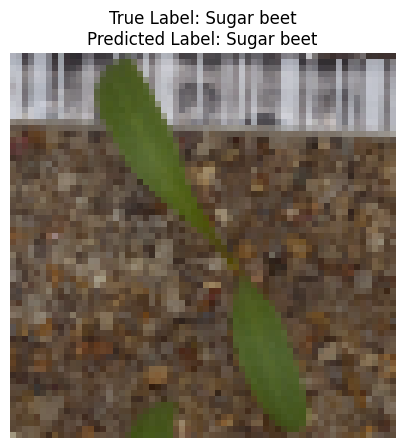

In [97]:
# Visualize a sample image along with its predicted and true label using the best model (VGG16 Transfer Learning)

# Select a random index from the test set
random_index = np.random.randint(0, len(X_test_normalized))

# Get the image, true label, and predicted label
sample_image = X_test_normalized[random_index]
true_label = enc.classes_[y_test_arg[random_index]]
predicted_label = enc.classes_[y_pred_arg[random_index]]

# Plot the image
plt.imshow(sample_image)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
plt.axis('off')
plt.show()


### Visualizing the prediction


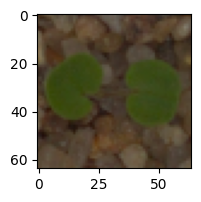

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


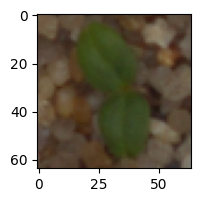

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label ['Cleavers']
True Label Cleavers


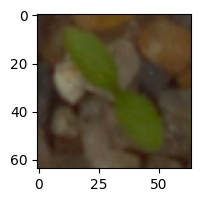

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


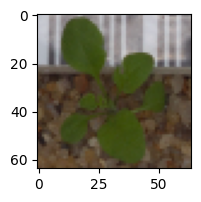

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [100]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2, 2))
plt.imshow(X_test[2])
plt.show()
print(
    "Predicted Label",
    enc.inverse_transform(model3.predict((X_test_normalized[2].reshape(1, 64, 64, 3)))),
)  # reshaping the input image as we are only trying to predict using a single image
print(
    "True Label", enc.inverse_transform(y_test_encoded)[2]
)  # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2, 2))
plt.imshow(X_test[33])
plt.show()
print(
    "Predicted Label",
    enc.inverse_transform(
        model3.predict((X_test_normalized[33].reshape(1, 64, 64, 3)))
    ),
)  # reshaping the input image as we are only trying to predict using a single image
print(
    "True Label", enc.inverse_transform(y_test_encoded)[33]
)  # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2, 2))
plt.imshow(
    X_test[59],
)
plt.show()
print(
    "Predicted Label",
    enc.inverse_transform(
        model3.predict((X_test_normalized[59].reshape(1, 64, 64, 3)))
    ),
)  # reshaping the input image as we are only trying to predict using a single image
print(
    "True Label", enc.inverse_transform(y_test_encoded)[59]
)  # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2, 2))
plt.imshow(X_test[36])
plt.show()
print(
    "Predicted Label",
    enc.inverse_transform(
        model3.predict((X_test_normalized[36].reshape(1, 64, 64, 3)))
    ),
)  # reshaping the input image as we are only trying to predict using a single image
print(
    "True Label", enc.inverse_transform(y_test_encoded)[36]
)  # using inverse_transform() to get the output label from the output vector

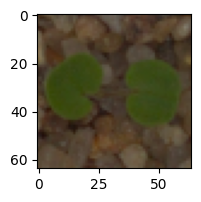

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill


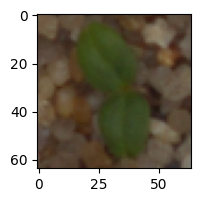

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Label: ['Cleavers']
True Label: Cleavers


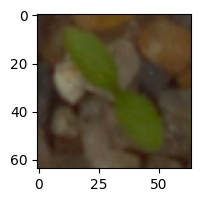

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Label: ['Common Chickweed']
True Label: Common Chickweed


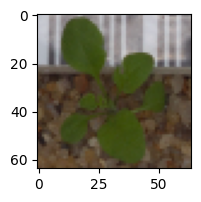

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label: ['Shepherds Purse']
True Label: Shepherds Purse


In [98]:
def visualize_prediction(index):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[index])
    plt.show()
    predicted_label = enc.inverse_transform(
        model3.predict((X_test_normalized[index].reshape(1, 64, 64, 3)))
    )
    true_label = enc.inverse_transform(y_test_encoded)[index]
    print("Predicted Label:", predicted_label)
    print("True Label:", true_label)


# Example usage:
visualize_prediction(2)
visualize_prediction(33)
visualize_prediction(59)
visualize_prediction(36)

## Actionable Insights and Business Recommendations

### Actionable Insights:

1. **Class Imbalance**:
    - The dataset exhibits a noticeable class imbalance, with some classes having significantly more samples than others. This imbalance can lead to biased model predictions, where the model performs well on majority classes but poorly on minority classes.

2. **Model Performance**:
    - The VGG16 Transfer Learning model achieved the highest test accuracy of 77.26%, indicating that it is the best-performing model among the ones tested. However, there is still room for improvement, especially in handling class imbalance and optimizing the model architecture.

3. **Misclassifications**:
    - Misclassifications are often into classes with similar visual characteristics. This suggests that the model may benefit from additional data augmentation techniques to increase the diversity of training samples and improve its robustness.

4. **Data Augmentation**:
    - Data augmentation techniques, such as rotation, zoom, and horizontal/vertical flips, were applied to the training data. These techniques helped improve the model's performance by increasing the diversity of the training samples.

5. **Transfer Learning**:
    - Leveraging pre-trained models like VGG16 and ResNet50 provided a significant boost in performance compared to training a model from scratch. Transfer learning allows the model to benefit from features learned from a large and diverse dataset, which helps in achieving better performance on the target dataset.
    - Though ResNet50 Performed poorly in this particular case, it would be more useful for larger images and complex deep learning.

### Business Recommendations:

1. **Address Class Imbalance**:
    - Implement strategies to address class imbalance, such as oversampling minority classes, undersampling majority classes, or using advanced techniques like Synthetic Minority Over-sampling Technique (SMOTE). This will help improve the model's performance on minority classes and lead to more balanced predictions.

2. **Enhance Data Augmentation**:
    - Explore additional data augmentation techniques to further increase the diversity of training samples. Techniques such as brightness adjustment, contrast adjustment, and adding noise can help the model generalize better to new, unseen data.

3. **Model Tuning and Optimization**:
    - Continue tuning the model's hyperparameters, such as learning rate, batch size, and number of epochs, to achieve better performance. Experiment with different optimizers and learning rate schedules to find the optimal configuration for the model.

4. **Advanced Architectures**:
    - Explore more advanced neural network architectures or combine multiple pre-trained models to enhance the model's accuracy. Techniques like ensemble learning, where predictions from multiple models are combined, can also be considered to improve overall performance.

5. **Regular Model Evaluation**:
    - Regularly evaluate the model's performance on new data to ensure it continues to perform well. Monitor key performance metrics, such as accuracy, precision, recall, and f1-score, to identify areas for improvement.

6. **Scalability and Deployment**:
    - Ensure that the model is scalable and can handle large volumes of data efficiently. Consider deploying the model in a production environment where it can be used to make real-time predictions. Implement monitoring and logging to track the model's performance and detect any issues.

7. **Continuous Learning**:
    - Implement a continuous learning pipeline where the model is periodically retrained with new data. This will help the model stay up-to-date with the latest trends and patterns in the data, leading to improved performance over time.

By addressing these actionable insights and implementing the recommended strategies, the business can achieve better model performance, more accurate predictions, and ultimately, more informed decision-making.


---
